## 그룹화 Cluster
- 비지도 학습 : label이 없는 datasets

## 데이터 수집

In [28]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
# iris_dataset.keys(), iris_dataset

## 데이터 분석

## 데이터 전처리

-결측치 처리

In [29]:
features = iris_dataset['data']
features[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [30]:
iris_dataset['target'], iris_dataset['feature_names']

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

## 모델 학습

알맞은 그룹 갯수 찾기

In [31]:
from sklearn.cluster import KMeans


In [36]:
cluster_loop_list = [2,3,4,5,6,7,8,9,10]

result_list = list() 

for number_cluster in cluster_loop_list :
    model_number = KMeans(n_clusters=number_cluster)
    model_number.fit(features)
    result_list.append(model_number.inertia_)
    pass

result_list

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

[152.34795176035792,
 78.85144142614601,
 57.22847321428572,
 46.44618205128205,
 39.054977867477874,
 34.421674242424245,
 30.25440267582659,
 28.136194289198933,
 26.145689090149617]

Elbow 확인

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


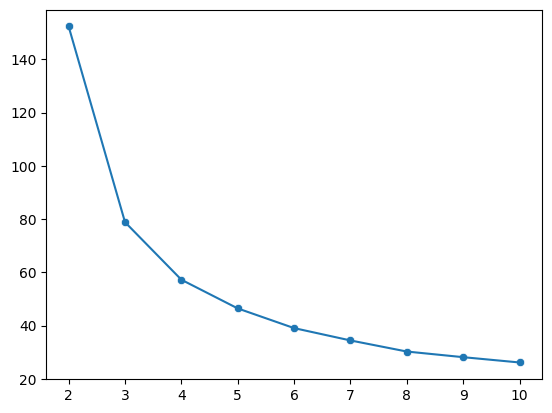

In [38]:
sns.scatterplot(x=cluster_loop_list, y=result_list)
sns.lineplot(x=cluster_loop_list, y=result_list)
plt.show()

# 적당한 n 클러스터는 3이다 왜냐하면 더 적은 각도이니까


찾은 갯수로 학습

In [33]:


# 중앙 갯수(카테고리 갯수) 지정
# model_Kmeans = KMeans(n_clusters=3)
model_Kmeans = KMeans(n_clusters=4) # 카테고리 갯수를 임의 지정
model_Kmeans.fit(X=features)



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

## 모델 평가

In [34]:
import numpy as np

# 데이터 레코드(Features Row 별 Model이 Predict한 label 값들)

# 내가 카테고리를 몇개를 설정하느냐가 가장 중요함 n_clusters=3 이냐 4이냐

model_Kmeans.labels_, np.unique(model_Kmeans.labels_)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
        2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
        2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0,
        3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
        0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3], dtype=int32),
 array([0, 1, 2, 3], dtype=int32))

In [35]:
# 각 카테고리별 중앙 벡터 확인

model_Kmeans.cluster_centers_

array([[6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

## 모델 배포